# Predicting Loan Repayment


The dataset for this project is retrieved from kaggle, the home of Data Science.

The major aim of this project is to predict whether the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained.

### **1- Importing Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px

### **2- Getting Data**

In [5]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.shape

(614, 13)

##### 2-1-Renaming columns

In [8]:
df.columns=df.columns.str.lower()

In [9]:
df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicant_income', 'co-applicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']

##### 2-2-Checking null values

In [10]:
df.isnull().sum()

loan_id                 0
gender                 13
married                 3
dependents             15
education               0
self_employed          32
applicant_income        0
co-applicant_income     0
loan_amount            22
loan_amount_term       14
credit_history         50
property_area           0
loan_status             0
dtype: int64

we take care of missing values in "loan_amount" and "credit_history".
For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

In [11]:
df['loan_amount']=df['loan_amount'].fillna(df['loan_amount'].mean())   

In [12]:
df['credit_history']=df['credit_history'].fillna(df['credit_history'].median())   

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isnull().sum()

loan_id                0
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicant_income       0
co-applicant_income    0
loan_amount            0
loan_amount_term       0
credit_history         0
property_area          0
loan_status            0
dtype: int64

In [15]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [16]:
df.shape

(542, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 13 columns):
loan_id                542 non-null object
gender                 542 non-null object
married                542 non-null object
dependents             542 non-null object
education              542 non-null object
self_employed          542 non-null object
applicant_income       542 non-null int64
co-applicant_income    542 non-null float64
loan_amount            542 non-null float64
loan_amount_term       542 non-null float64
credit_history         542 non-null float64
property_area          542 non-null object
loan_status            542 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB


In [18]:
df.describe()

,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,145.518139,341.955720,0.863469
std,5506.461371,2543.801628,81.749385,65.441582,0.343669
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,129.500000,360.000000,1.000000
75%,5820.500000,2281.000000,167.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


##### 2-3-Label Encoder for Dependents

In [19]:
type(df['dependents'].iloc[0])

str

In [20]:
df['dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [21]:
model6=LabelEncoder()

In [22]:
model6.fit(df['dependents'])

LabelEncoder()

In [23]:
df['dependents']= model6.transform(df['dependents'])

### 3-Exploratory Data Analysis

##### 3-1- Visualization

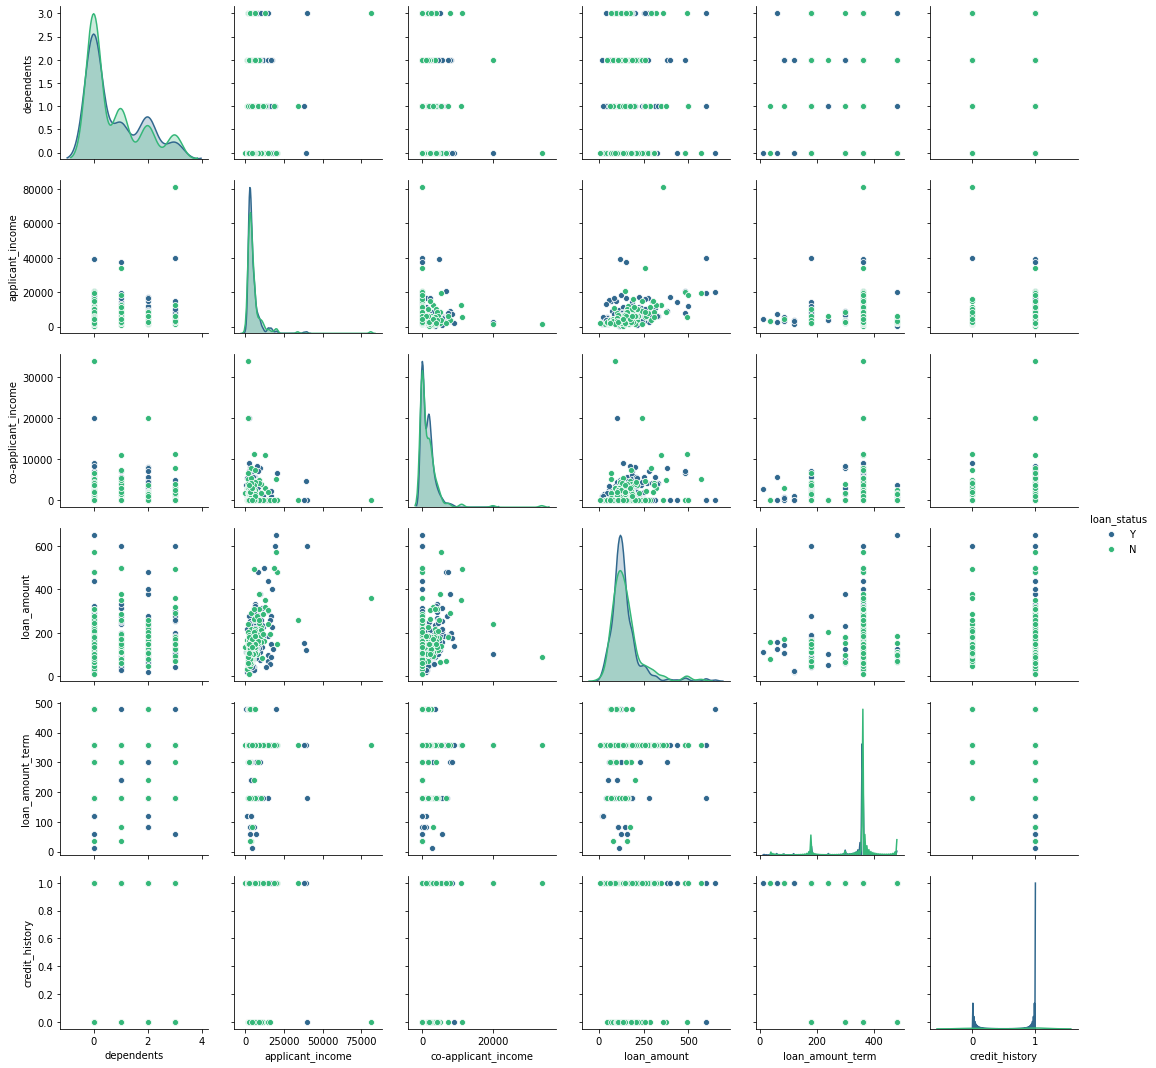

In [26]:
sns.pairplot(df,hue='loan_status',palette='viridis')

In [27]:
df[df['loan_status']=='Y'].count()['loan_status']

376

In [28]:
df[df['loan_status']=='N'].count()['loan_status']

166

Text(0.5, 1.0, 'Distribution of Loan Status')

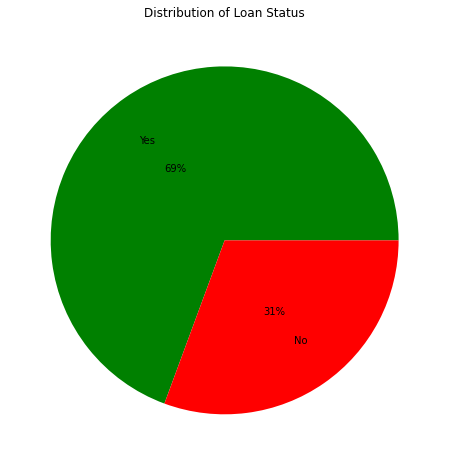

In [29]:
plt.figure(figsize=(8,8))
plt.pie(x=[376,166], labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['g','r'])
plt.title('Distribution of Loan Status')

69% of applicants repay the loan and 39% do not repay the loan.

([], [])

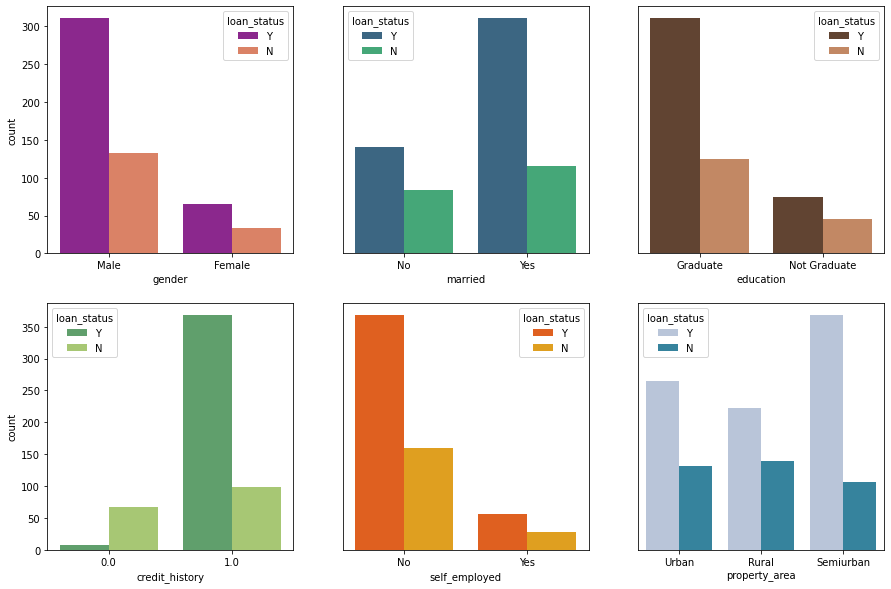

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='gender' ,hue='loan_status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='credit_history', data=df,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.countplot(x='self_employed',hue='loan_status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',data=df,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.
   
Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.
    
Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.
    
Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan.

In [105]:
px.sunburst( data_frame=df,path=['gender','loan_status'], color='loan_amount')

([], [])

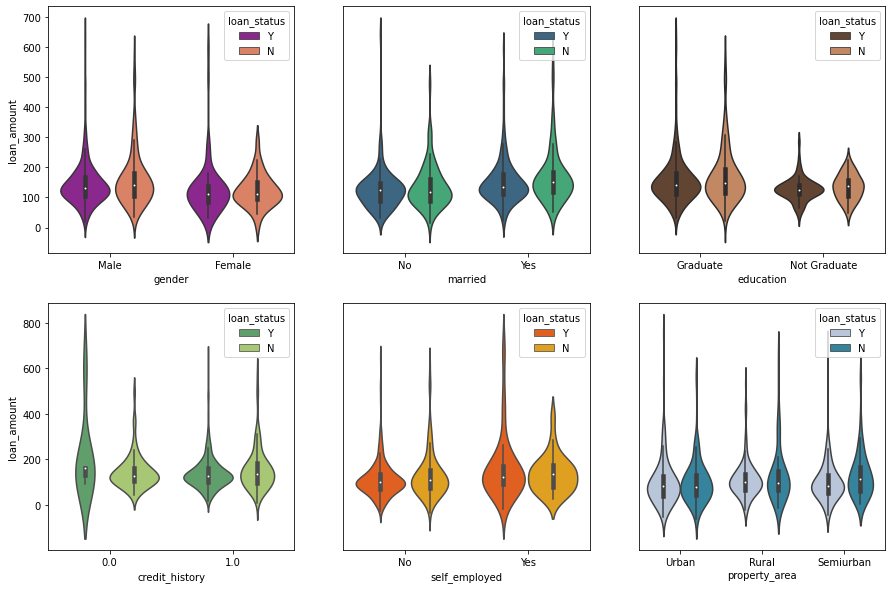

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

<AxesSubplot:xlabel='loan_amount'>

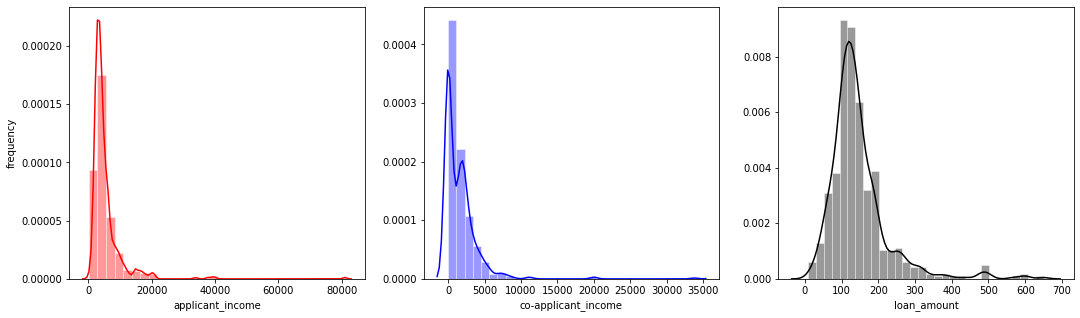

In [55]:
plt.figure(figsize=(18,5))


plt.subplot(1,3,1)
sns.distplot(df['applicant_income'],bins=30,color='r',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

plt.subplot(1,3,2)
sns.distplot(df['co-applicant_income'],bins=30,color='blue',hist_kws=dict(edgecolor='white'))

plt.subplot(1,3,3)
sns.distplot(df['loan_amount'],bins=30,color='black',hist_kws=dict(edgecolor='white'))

In [56]:
px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

##### 3-2-Encoding

###### 3-2-1-gender

In [57]:
model1=LabelEncoder()

In [58]:
model1.fit(df['gender'])

LabelEncoder()

In [59]:
df['gender']= model1.transform(df['gender'])

###### 3-2-2-married

In [60]:
model2=LabelEncoder()

In [61]:
model2.fit(df['married'])

LabelEncoder()

In [62]:
df['married']= model2.transform(df['married'])

###### 3-2-3-education

In [64]:
model3=LabelEncoder()

In [65]:
model3.fit(df['education'])

LabelEncoder()

In [66]:
df['education']= model3.transform(df['education'])

###### 3-2-4-self_employed

In [67]:
model4=LabelEncoder()

In [68]:
model4.fit(df['self_employed'])

LabelEncoder()

In [69]:
df['self_employed']= model4.transform(df['self_employed'])

###### 3-2-5-property_area

In [70]:
model5=LabelEncoder()

In [71]:
model5.fit(df['property_area'])

LabelEncoder()

In [72]:
df['property_area']= model5.transform(df['property_area'])

###### 3-2-6-loan status

In [73]:
model6=LabelEncoder()

In [74]:
model6.fit(df['loan_status'])

LabelEncoder()

In [75]:
df['loan_status']= model6.transform(df['loan_status'])

In [76]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

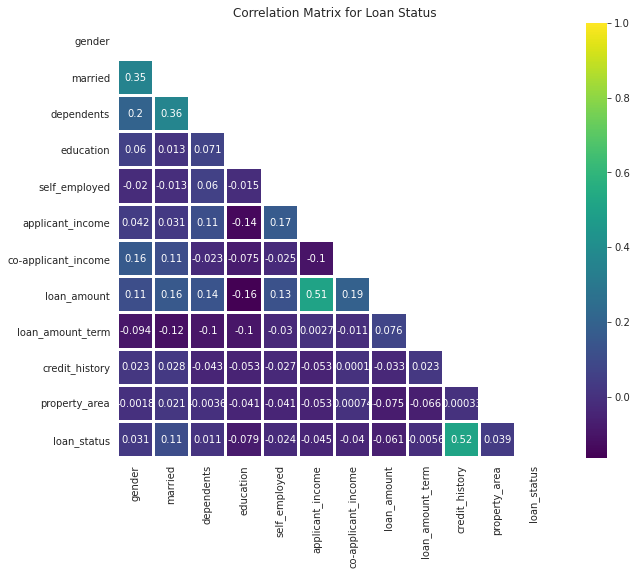

In [77]:
plt.figure(figsize=(12,8))

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### 4-Prediction

##### 4-1-LogisticRegression

In [78]:
X=df.drop(['loan_id','loan_status'],axis=1)
y=df['loan_status']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [103]:
lr=LogisticRegression()

In [104]:
lr.fit(X_train, y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
lr_prediction=lr.predict(X_test)

In [106]:
print(confusion_matrix(y_test,lr_prediction))
print('\n')
print(classification_report(y_test,lr_prediction))
print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test,lr_prediction))

[[10 21]
 [ 0 78]]


              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.79      1.00      0.88        78

    accuracy                           0.81       109
   macro avg       0.89      0.66      0.68       109
weighted avg       0.85      0.81      0.77       109



Logistic Regression accuracy:  0.8073394495412844


### 4-2-Decision Tree 

In [107]:
dt=DecisionTreeClassifier()

In [108]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [109]:
dt_prediction=dt.predict(X_test)

In [110]:
print(confusion_matrix(y_test,dt_prediction))
print('\n')
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

[[14 17]
 [16 62]]


              precision    recall  f1-score   support

           0       0.47      0.45      0.46        31
           1       0.78      0.79      0.79        78

    accuracy                           0.70       109
   macro avg       0.63      0.62      0.62       109
weighted avg       0.69      0.70      0.70       109



Decision Tree Accuracy:  0.6972477064220184


##### 4-3-Random Forest

In [111]:
rf=RandomForestClassifier(n_estimators=200)

In [112]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
rf_prediction=rf.predict(X_test)

In [114]:
print(confusion_matrix(y_test,rf_prediction))
print('\n')
print(classification_report(y_test,rf_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))

[[12 19]
 [ 5 73]]


              precision    recall  f1-score   support

           0       0.71      0.39      0.50        31
           1       0.79      0.94      0.86        78

    accuracy                           0.78       109
   macro avg       0.75      0.66      0.68       109
weighted avg       0.77      0.78      0.76       109



Random Forest Accuracy:  0.7798165137614679


##### 4-4-KNearest Neighbors

In [115]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

[0.3853211009174312, 0.48623853211009177, 0.4036697247706422, 0.44954128440366975, 0.43119266055045874, 0.45871559633027525, 0.3486238532110092, 0.3669724770642202, 0.3302752293577982, 0.3302752293577982, 0.3119266055045872, 0.3394495412844037, 0.29357798165137616, 0.30275229357798167, 0.29357798165137616, 0.3119266055045872, 0.3211009174311927, 0.29357798165137616, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.26605504587155965, 0.26605504587155965, 0.27522935779816515, 0.27522935779816515, 0.28440366972477066, 0.27522935779816515, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066]


Text(0.5, 1.0, 'Elbow Method')

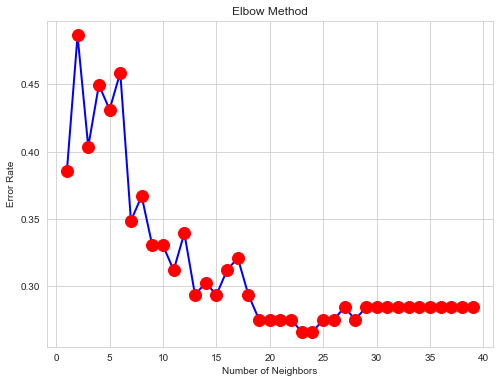

In [116]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [117]:
knn=KNeighborsClassifier(n_neighbors=23)

In [118]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [119]:
knn_prediction=knn.predict(X_test)

In [126]:
print(confusion_matrix(y_test,knn_prediction))
print('\n')
print(classification_report(y_test,knn_prediction))
print('\n')
print('KNN accuracy Accuracy: ', accuracy_score(y_test,knn_prediction))

[[ 2 29]
 [ 0 78]]


              precision    recall  f1-score   support

           0       1.00      0.06      0.12        31
           1       0.73      1.00      0.84        78

    accuracy                           0.73       109
   macro avg       0.86      0.53      0.48       109
weighted avg       0.81      0.73      0.64       109



KNN accuracy Accuracy:  0.7339449541284404


##### 4-5-SVC

In [121]:
svc=SVC()

In [122]:
svc.fit(X_train, y_train)

C:\Users\Soha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [123]:
svc_prediction=svc.predict(X_test)

In [127]:
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print(classification_report(y_test,svc_prediction))
print('\n')
print('SVC َAccuracy: ', accuracy_score(y_test,svc_prediction))

[[ 0 31]
 [ 0 78]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.72      1.00      0.83        78

    accuracy                           0.72       109
   macro avg       0.36      0.50      0.42       109
weighted avg       0.51      0.72      0.60       109



SVC َAccuracy:  0.7155963302752294


In [129]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))
print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

Logistic Regression Accuracy:  0.8073394495412844
Decision Tree Accuracy:  0.6972477064220184
Random Forest Accuracy:  0.7798165137614679
KNN Accuracy:  0.7339449541284404
SVC Accuracy:  0.7155963302752294


### CONCLUSION

The Loan Status is heavily dependent on the Credit History for Predictions.

The Logistic Regression algorithm gives us the maximum Accuracy (80%) compared to the other 4 Machine Learning Classification Algorithms.